In [1]:
import re

In [2]:
f = open('e_coli_genes.txt')
gene_file = f.read().replace('\n', '')
f.close()
locations = re.findall('(\d+)\.\.(\d+)', gene_file)
genes = re.findall(']([AGTC]+)', gene_file)

In [3]:
f_2 = open('e_coli_genome.txt')
genome = f_2.read().replace('\n', '')
f_2.close()

In [4]:
length = 6

In [5]:
from collections import Counter

In [6]:
sub_genome = [genome[i:i+length] for i in range(len(genome)-length+1)]
hash = Counter(sub_genome)

In [7]:
sub_genes = [i[j:j+length] for i in genes for j in range(len(i)-length+1)]
hash_2 = Counter(sub_genes)

In [8]:
def makeHash(k, first_k = ['A', 'G', 'T', 'C']):
    if k == 1:
        return first_k
    to_return = []
    for i in first_k:
        for j in makeHash(k - 1):
            to_return.append(i + j)
    return to_return

hash_table = makeHash(length)[:4 ** (length-1) * 2]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def makeComplement(sequence):
    bases = ['A', 'G', 'T', 'C']
    complements = ['T', 'C', 'A', 'G']
    to_return = ''
    for i in sequence[::-1]:
        to_return += complements[bases.index(i)]
    return to_return

In [11]:
to_plot_x = []
for i in hash_table:
    if i in hash and makeComplement(i) in hash:
        to_plot_x.append(hash[i] + hash[makeComplement(i)])
    elif i in hash:
        to_plot_x.append(hash[i])
    elif makeComplement(i) in hash:
        to_plot_x.append(hash[makeComplement(i)])
    else:
        to_plot_x.append(0)

to_plot_y = []
for i in hash_table:
    if i in hash_2 and makeComplement(i) in hash_2:
        to_plot_y.append(hash_2[i] + hash_2[makeComplement(i)])
    elif i in hash_2:
        to_plot_y.append(hash_2[i])
    elif makeComplement(i) in hash_2:
        to_plot_y.append(hash_2[makeComplement(i)])
    else:
        to_plot_y.append(0)

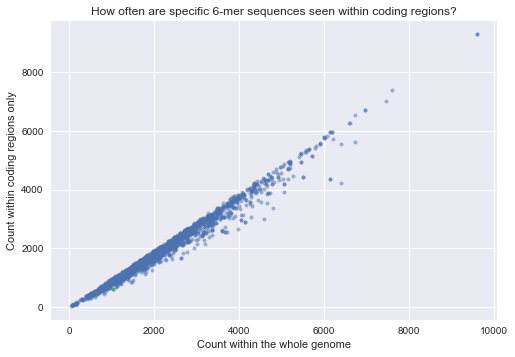

In [20]:
plt.scatter(to_plot_x, to_plot_y, s=12.5, alpha=0.5)
plt.scatter(to_plot_x[hash_table.index(makeComplement('TATAAT'))],
            to_plot_y[hash_table.index(makeComplement('TATAAT'))], s=12.5)
plt.xlabel('Count within the whole genome')
plt.ylabel('Count within coding regions only')
plt.title('How often are specific 6-mer sequences seen within coding regions?')
plt.savefig('kmers_in_genes.png', dpi=300)
plt.show()

In [13]:
import numpy as np
hash_table[to_plot_x.index(np.max(to_plot_x))]

'GCTGGC'

In [14]:
hash_table[to_plot_y.index(np.min(to_plot_y))]

'GTCTAG'

In [15]:
np.min(to_plot_y)

29

In [16]:
one_hot = np.zeros((1,len(genome)))

In [17]:
for i in locations:
    one_hot[0, int(i[0])-1:int(i[1])-1] = 1

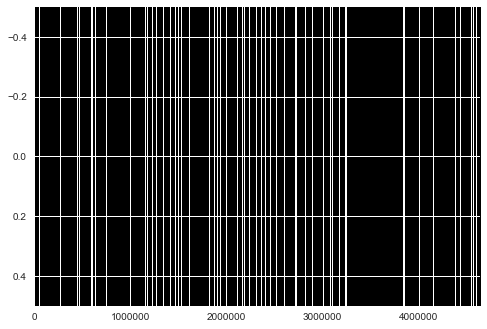

In [18]:
plt.imshow(one_hot, aspect='auto')
plt.show()